In [1]:
%load_ext autoreload
%autoreload 2

import math
import operator
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng
from tic_env import TictactoeEnv, OptimalPlayer
from QLearning_env import QPlayer, QTraining, get_state_best_Q
from utils import plots_several_trainings, plots_several_trainings_subfigures, plot_game_heatmaps
from utils import get_max_Mopt_Mrng_for_epsilon
from tqdm import tqdm
import random

### Question 1

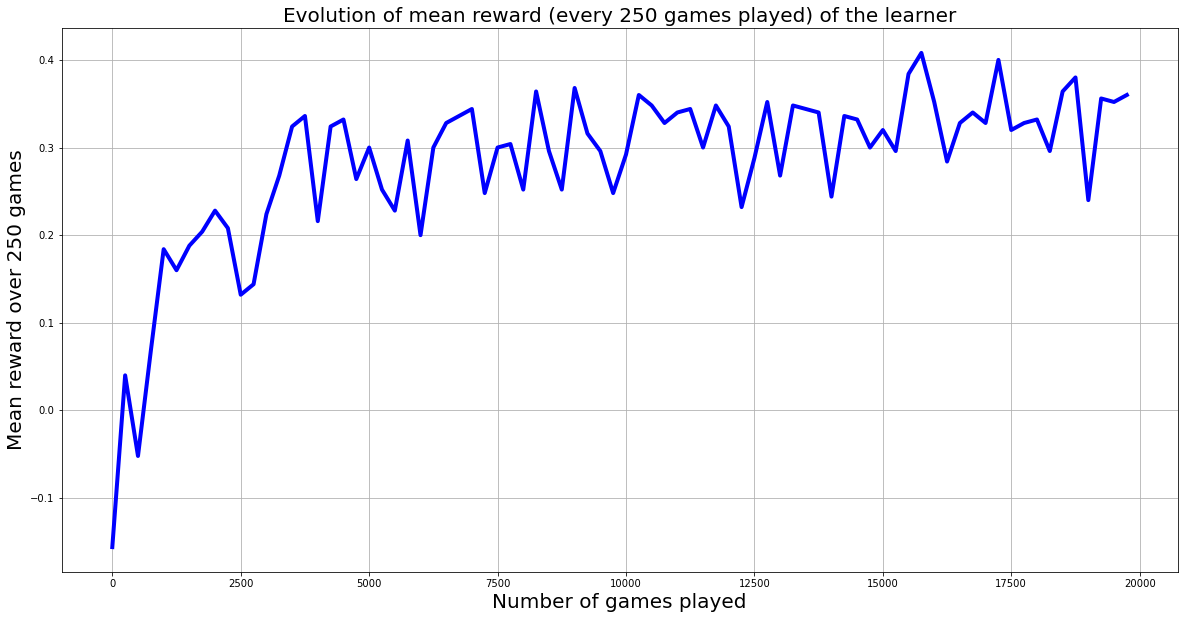

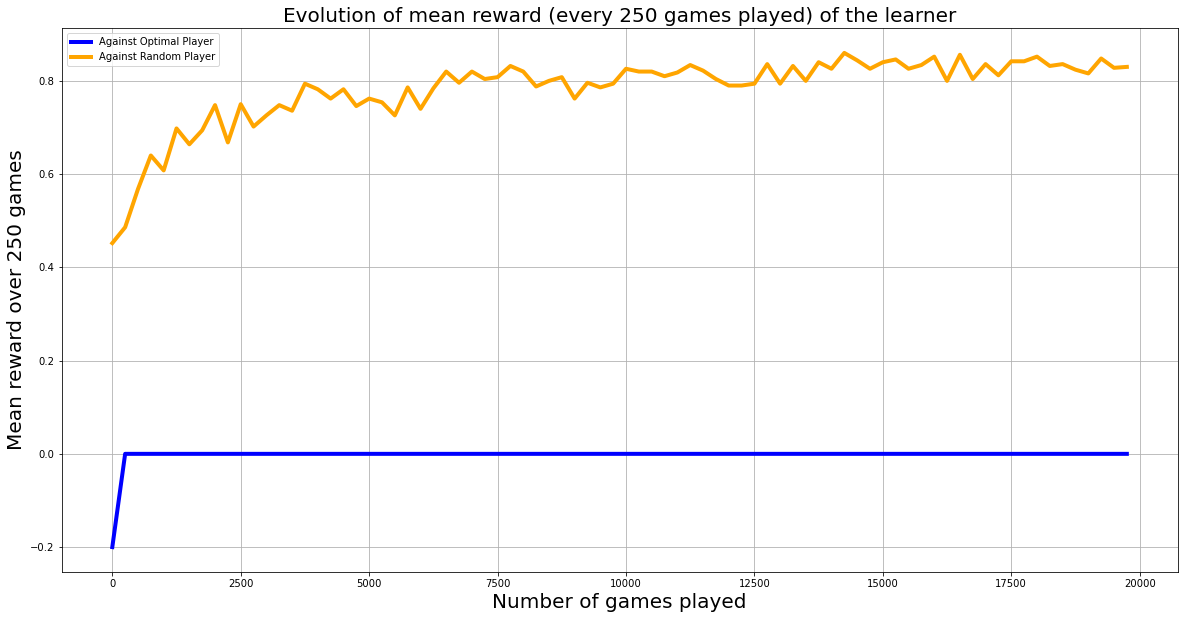

In [2]:
eps_policy = lambda ep: 0.1

training = QTraining(eps_policy)
training.train(0.5, run_test= True)

training.plot_mean_reward_during_training()
training.plot_mopt_mrng_during_training()

In [3]:
# Part 2.1.1
n_stars = [1, 5000, 10000, 15000, 25000, 40000]
epsilon_min = 0.1
epsilon_max = 0.8

values = []
values_mopt_mrng = []
names = []
epochs = 0
avg_step = 0

for n_star in n_stars:
    epsilon_greedy_policy = lambda ep: max(epsilon_min, epsilon_max*(1-ep/n_star))
    training2 = QTraining(epsilon_greedy_policy)
    training2.train(0.5, run_test=True)
    epochs = training2.epoch
    avg_step = training2.avg_step
    
    values.append(training2.avg_reward)
    values_mopt_mrng.append([training2.score_test_opt, training2.score_test_rng])
    names.append(f"$n^*=${n_star}")

### Question 2

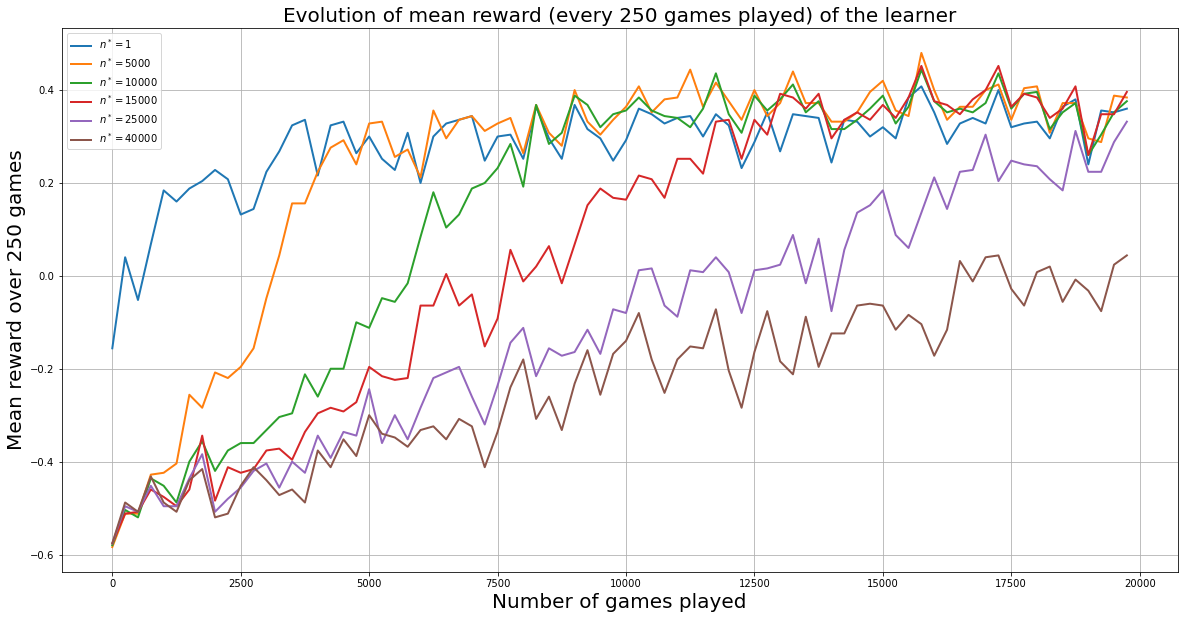

In [4]:
plots_several_trainings(values, names, avg_step, epochs)

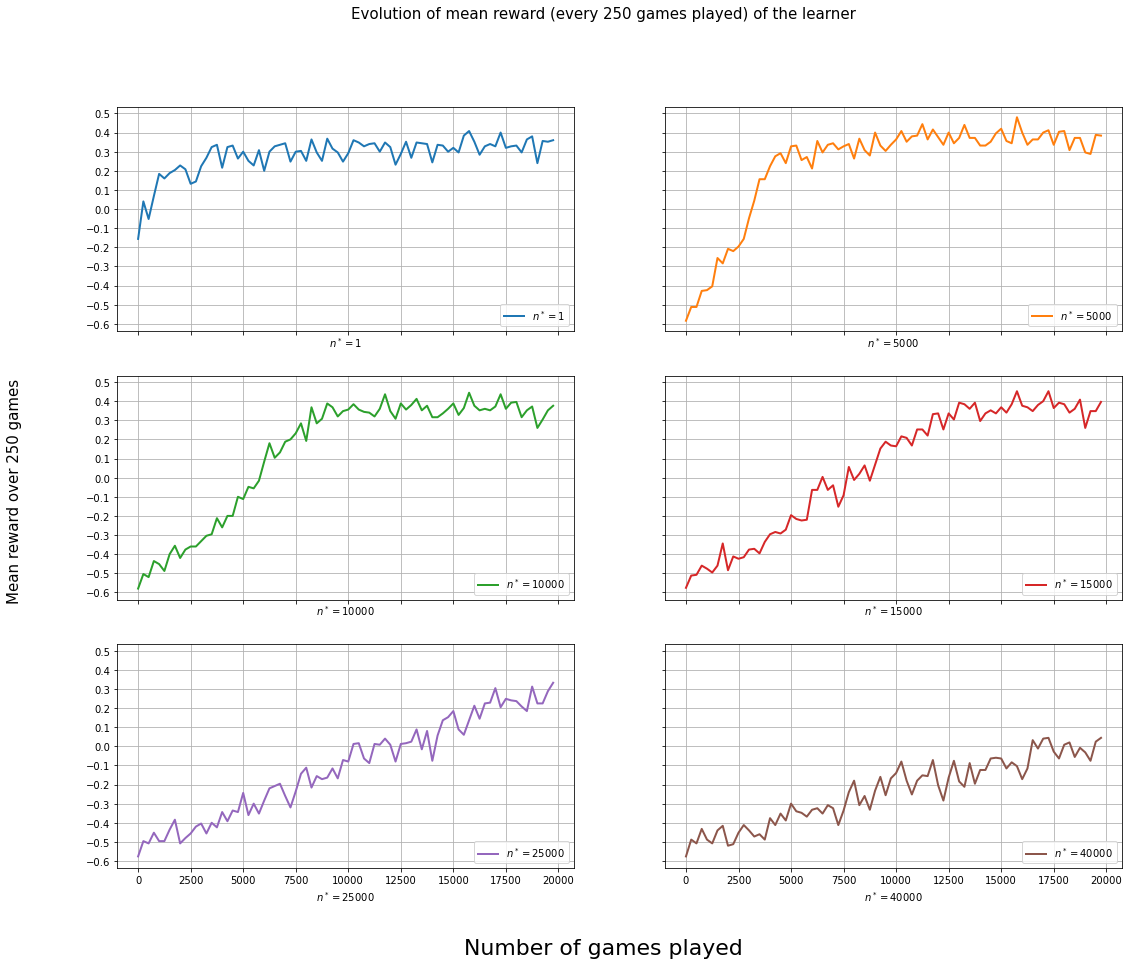

In [5]:
plots_several_trainings_subfigures(values, names, avg_step, epochs)

In [6]:
highest_mean_rew = n_stars[np.argmax(np.mean(values, axis=1))]

print('The n_star with the best average reward across the whole training is n_star={}.'.format(highest_mean_rew))

The n_star with the best average reward across the whole training is n_star=1.


### Question 3

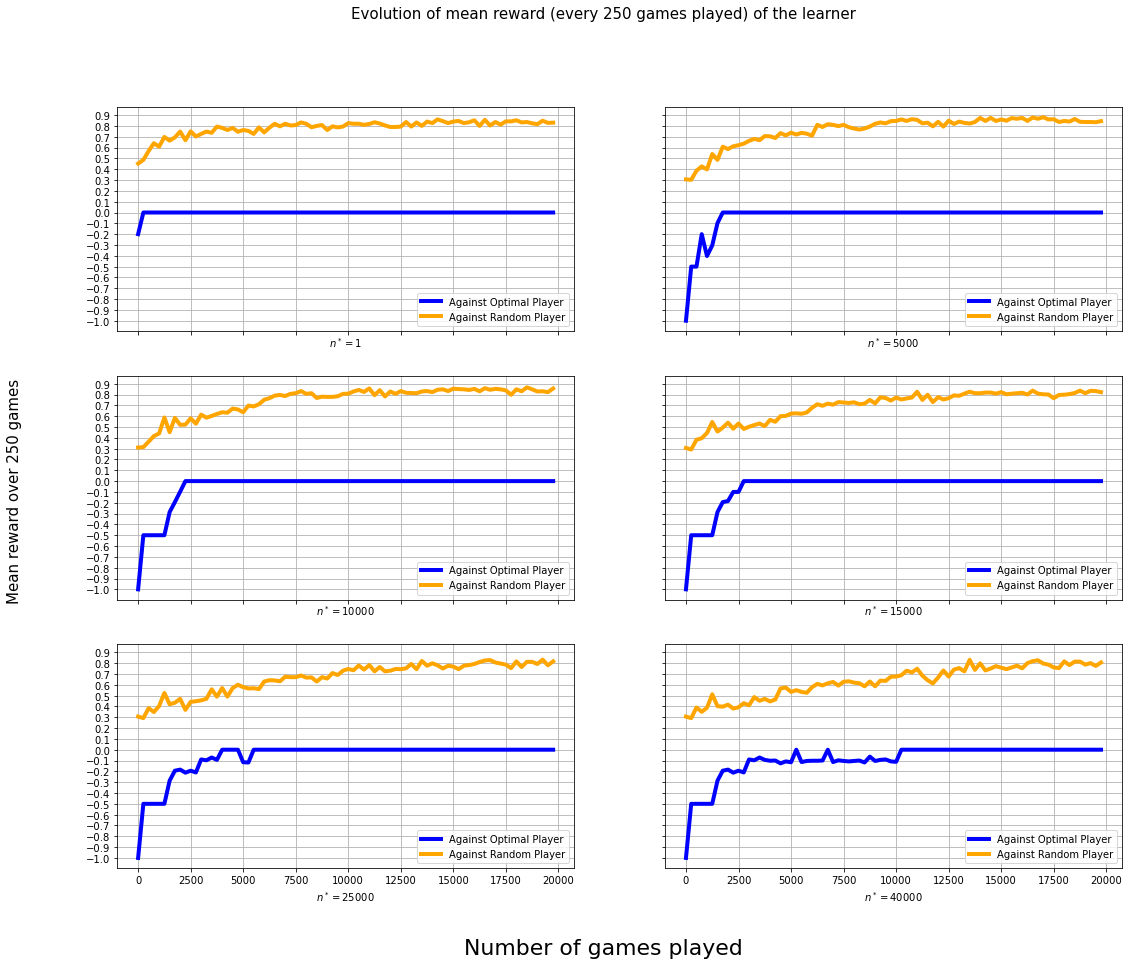

In [8]:
plots_several_trainings_subfigures(values_mopt_mrng, names, training2.test_step, epochs, mopt_mrng=True)

Let's take a closer look on the best reward as it is hard to dicern only from the graphs:

In [24]:
for i, (m_rand, m_opt) in enumerate(values_mopt_mrng):
    print('Best avg reward after convergence for n_start={} is {}'.format(n_stars[i], np.max(m_opt[:-8])))

Best avg reward after convergence for n_start=1 is 0.86
Best avg reward after convergence for n_start=5000 is 0.88
Best avg reward after convergence for n_start=10000 is 0.858
Best avg reward after convergence for n_start=15000 is 0.836
Best avg reward after convergence for n_start=25000 is 0.828
Best avg reward after convergence for n_start=40000 is 0.83


From the above plots and statistics, it seems $n^*$=5000 is the best (max average reward after convergence significantly better than its neighbours).

In [25]:
# Part 2.1.2

n_star_best = 5000

epsilon_opts = [0.0, 0.1, 0.3, 0.5, 0.8, 1.0]
epsilon_min = 0.1
epsilon_max = 0.8
epsilon_greedy_policy = lambda ep: max(epsilon_min, epsilon_max*(1-ep/n_star_best))

values = []
values_mopt_mrng = []
names = []
epochs = 0
avg_step = 0

for epsilon_opt in epsilon_opts:
    training2 = QTraining(epsilon_greedy_policy)
    training2.train(epsilon_opt, run_test=True)
    epochs = training2.epoch
    avg_step = training2.avg_step
    
    values.append(training2.avg_reward)
    values_mopt_mrng.append([training2.score_test_opt, training2.score_test_rng])
    names.append(f"epsilon_opt={epsilon_opt}")

### Question 4

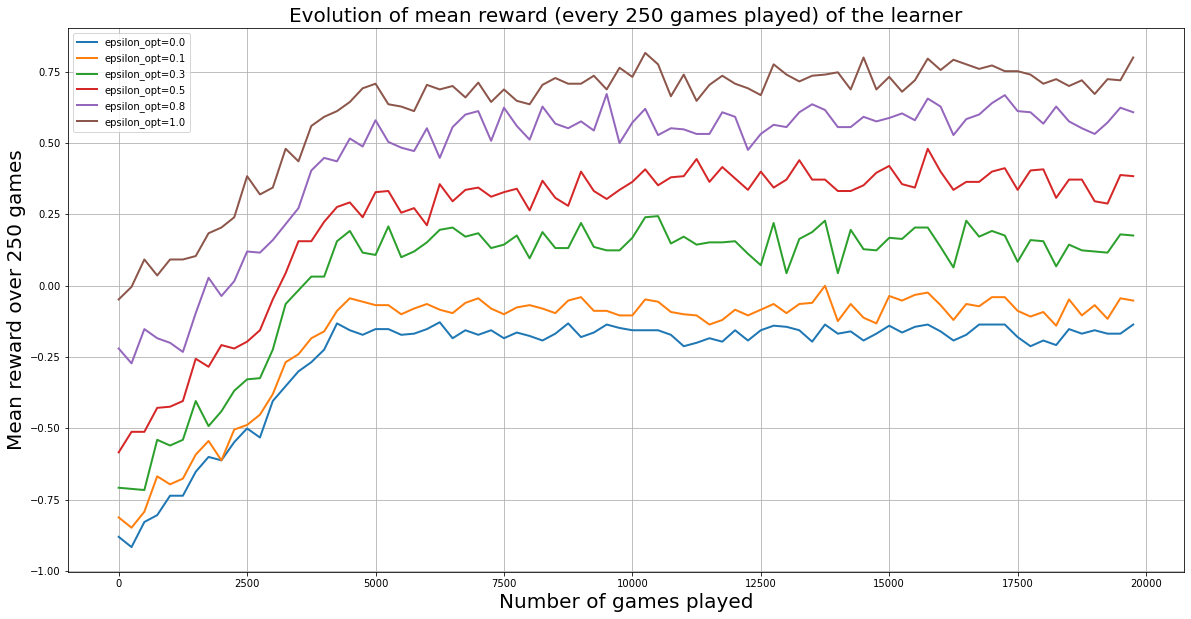

In [26]:
plots_several_trainings(values, names, avg_step, epochs)

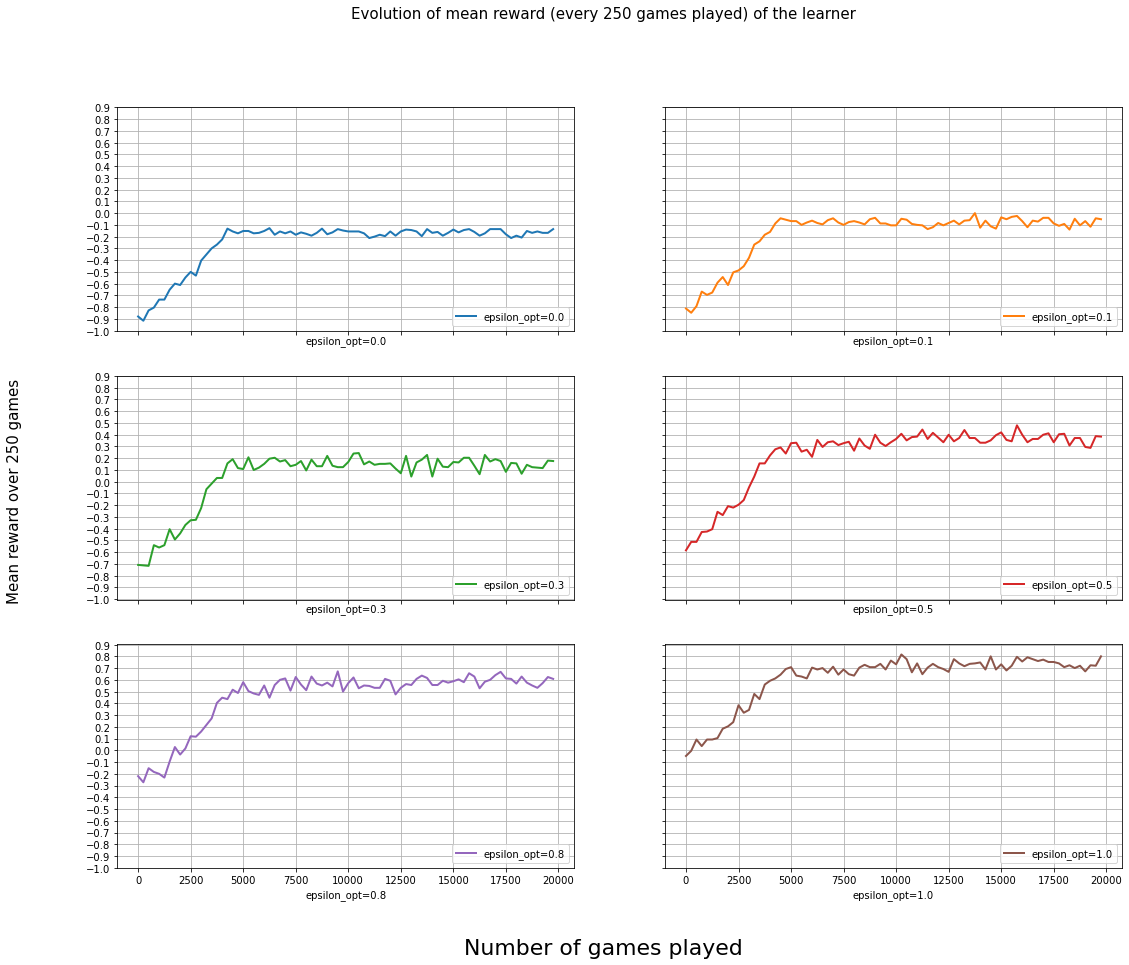

In [27]:
plots_several_trainings_subfigures(values, names, avg_step, epochs)

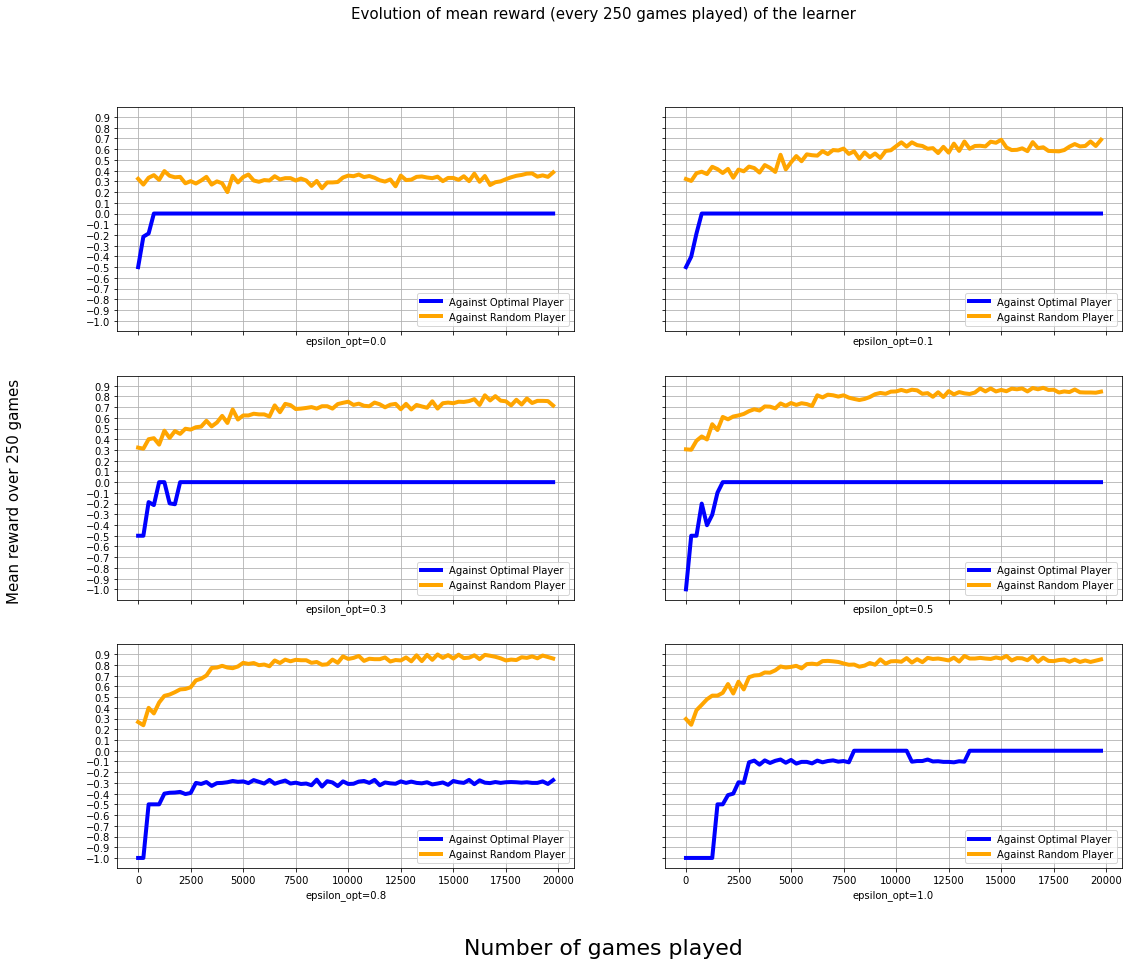

In [28]:
plots_several_trainings_subfigures(values_mopt_mrng, names, training2.test_step, epochs, mopt_mrng=True)

One can notice that when training against Opt(0) or other close to perfect player, the learner quickly finds strategies to achieve a draw.

### Question 5

In [30]:
(max_Mrnd, max_Mopt), (best_eps_rnd, best_eps_opt) = get_max_Mopt_Mrng_for_epsilon(values_mopt_mrng,epsilon_opts, "epsilon-opt")

Maximal M_opt = 0.0 and is achieved for epsilon-opt = 0.0
Maximal M_rnd = 0.898 and is achieved for epsilon-opt = 0.8


In [31]:
for i, (m_rand, m_opt) in enumerate(values_mopt_mrng):
    print('Best avg reward after convergence for opponent epsilon={} is {}'.format(epsilon_opts[i], np.max(m_opt[:-8])))

Best avg reward after convergence for opponent epsilon=0.0 is 0.396
Best avg reward after convergence for opponent epsilon=0.1 is 0.688
Best avg reward after convergence for opponent epsilon=0.3 is 0.81
Best avg reward after convergence for opponent epsilon=0.5 is 0.88
Best avg reward after convergence for opponent epsilon=0.8 is 0.898
Best avg reward after convergence for opponent epsilon=1.0 is 0.884


### Question 6

By looking at the figures above we can see we achieve 0 mean reward (on testing) in each case except when training against fully random adversary. It seems the best $\epsilon_{opt}$ is therefore 0.8.

### Question 7

In [ ]:
eps = [0.0, 0.1, 0.3, 0.5, 0.7, 0.9]

values = []
values_mopt_mrng = []
names = []
epochs = 0
avg_step = 0

for ep in eps:
    epsilon_greedy_policy = lambda e: ep
    training = QTraining(epsilon_greedy_policy)
    training.train(ep, run_test=True, self_learning = True)
    epochs = training.epoch
    avg_step = training.avg_step
    
    values.append(training.avg_reward)
    values_mopt_mrng.append([training.score_test_opt, training.score_test_rng])
    names.append(f"$epsilon=${ep}")

 50%|█████████████████████████████████████▉                                      | 9972/20000 [01:40<01:00, 165.83it/s]

In [ ]:
plots_several_trainings(values, names, avg_step, epochs)

In [ ]:
plots_several_trainings_subfigures(values_mopt_mrng, names, training.test_step, epochs, mopt_mrng=True)

In [ ]:
n_stars = [1, 5000, 10000, 15000, 25000, 40000]
epsilon_min = 0.1
epsilon_max = 0.8

values = []
values_mopt_mrng = []
names = []
epochs = 0
avg_step = 0

for n_star in n_stars:
    epsilon_greedy_policy = lambda ep: max(epsilon_min, epsilon_max*(1-ep/n_star))
    training2 = QTraining(epsilon_greedy_policy)
    training2.train(0.5, run_test=True, self_learning=True)
    epochs = training2.epoch
    avg_step = training2.avg_step
    
    values.append(training2.avg_reward)
    values_mopt_mrng.append([training2.score_test_opt, training2.score_test_rng])
    names.append(f"$n^*=${n_star}")

In [ ]:
plots_several_trainings(values, names, avg_step, epochs)

In [ ]:
plots_several_trainings_subfigures(values, names, avg_step, epochs)

### Question 8

In [ ]:
plots_several_trainings_subfigures(values_mopt_mrng, names, training2.test_step, epochs, mopt_mrng=True)

### Question 9

In [ ]:
(max_Mrnd, max_Mopt), (best_eps_rnd, best_eps_opt) = get_max_Mopt_Mrng_for_epsilon(values_mopt_mrng, n_stars, "n_star")

### Question 10

In [ ]:
states = ["---------", "XX-OO----", "X--O-X-O-"]
titles = ["Starting board", "Winning position", "Tactical move"]

# situation1: Starting board
"""
- - -
- - -
- - -
"""
# situation2: Winning position
""" 
X X -
O O -
- - -
"""

# situation3: Tactical move
""" 
X - -
O - X
- O -
"""

# Train the self-learners to obtain final Q-values
epsilon_min = 0.1
epsilon_max = 0.8
n_star = 10000 # TODO change to the best n_start
training2 = QTraining(lambda ep: max(epsilon_min, epsilon_max*(1-ep/n_star)))
training2.train(0.5, run_test=False, self_learning=True)

plot_game_heatmaps(states, training2.Q_vals, titles)